In [16]:
!pip install -q tensorflow==2.0.0-alpha0

In [17]:
#Keras Datasets

In [18]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

In [19]:
#splitting data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [20]:
#Finally we will define a list of the class names and pre-process images. We do this by dividing each image by 255. Since each image is greyscale we are simply scaling the pixel values down to make computations easier for our model.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

In [21]:
# Creating the Model
# Now time to create our first neural network model! We will do this by using the Sequential object from keras. A Sequential model simply defines a sequence of layers starting with the input layer and ending with the output layer. Our model will have 3 layers, and input layer of 784 neurons (representing all of the 28x28 pixels in a picture) a hidden layer of an arbitrary 128 neurons and an output layer of 10 neurons representing the probability of the picture being each of the 10 classes.

model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)),
	keras.layers.Dense(128, activation="relu"),
	keras.layers.Dense(10, activation="softmax")
	])

In [24]:
# training and fitting model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=35)

Epoch 1/35
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1756 - accuracy: 0.9349
Epoch 2/35
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1716 - accuracy: 0.9358
Epoch 3/35
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1676 - accuracy: 0.9369
Epoch 4/35
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1630 - accuracy: 0.9388
Epoch 5/35
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1585 - accuracy: 0.9398
Epoch 6/35
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1551 - accuracy: 0.9420
Epoch 7/35
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1508 - accuracy: 0.9437
Epoch 8/35
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1490 - accuracy: 0.9436
Epoch 9/35
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1447 - accuracy: 0.9454
Epoch 10/35
60000/60000 [============

In [25]:
# testing the model

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.5340 - accuracy: 0.8855

Test accuracy: 0.8855


In [26]:
# making predictions

predictions = model.predict(test_images)

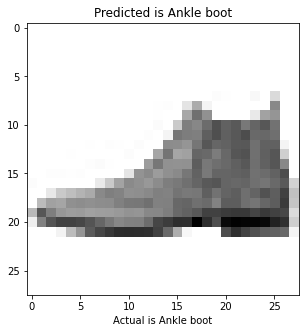

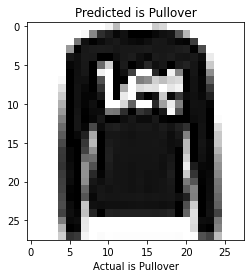

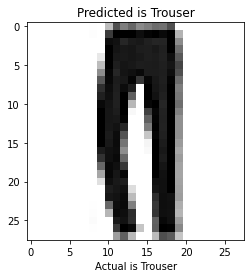

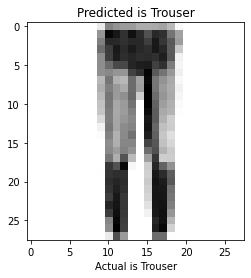

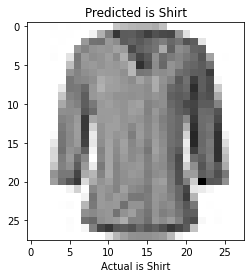

In [29]:
plt.figure(figsize=(5,5))   # predictions on first 5 images
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual is " + class_names[test_labels[i]])
    plt.title("Predicted is " + class_names[np.argmax(predictions[i])])
    plt.show()